In [1]:
from tifffile import imread
import os
from os.path import exists
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

## Parameters and path

In [2]:
line_color = "white"  # #00274C
scalebar_color = "white"

cmap_color_start = "black"
cmap_color_end = "#317EC2"
cmap_name = "dark2blue"
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)

In [18]:
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig1_system design/condensate_sideview"
os.chdir(folder_save)

In [16]:
# full size: 418x674
zoom_in_x = (0, 418)
zoom_in_y = (0, 674)
scale_bar_offset = 10

# Cropping
ilastik_output = ilastik_output[
    zoom_in_y[0] : zoom_in_y[1], zoom_in_x[0] : zoom_in_x[1]
]
img = img[zoom_in_y[0] : zoom_in_y[1], zoom_in_x[0] : zoom_in_x[1]]

mask_all_condensates = 2 - ilastik_output  # background label=2, condensate label=1
# find contours coordinates in binary edge image. contours here is a list of np.arrays containing all coordinates of each individual edge/contour.
contours, _ = cv2.findContours(
    mask_all_condensates, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)


plt.figure(dpi=300)
# Contrast stretching
vmin, vmax = np.percentile(img, (plow, phigh))
plt.imshow(img, cmap="Blues", vmin=vmin, vmax=vmax)
for cnt in contours:
    x = cnt[:, 0][:, 0]
    y = cnt[:, 0][:, 1]
    plt.plot(x, y, "-", color=line_color, linewidth=2, alpha=0.7)
    # still the last closing line will be missing, get it below
    xlast = [x[-1], x[0]]
    ylast = [y[-1], y[0]]
    plt.plot(xlast, ylast, "-", color=line_color, linewidth=2, alpha=0.7)
plt.xlim(0, img.shape[0])
plt.ylim(0, img.shape[1])
plt.plot(
    [scale_bar_offset, scale_bar_offset + scalebar_length_pxl],
    [scale_bar_offset, scale_bar_offset],
    "-",
    color=scalebar_color,
    lw=7,
)
plt.axis("scaled")
plt.show()

NameError: name 'ilastik_output' is not defined

### Side view plot

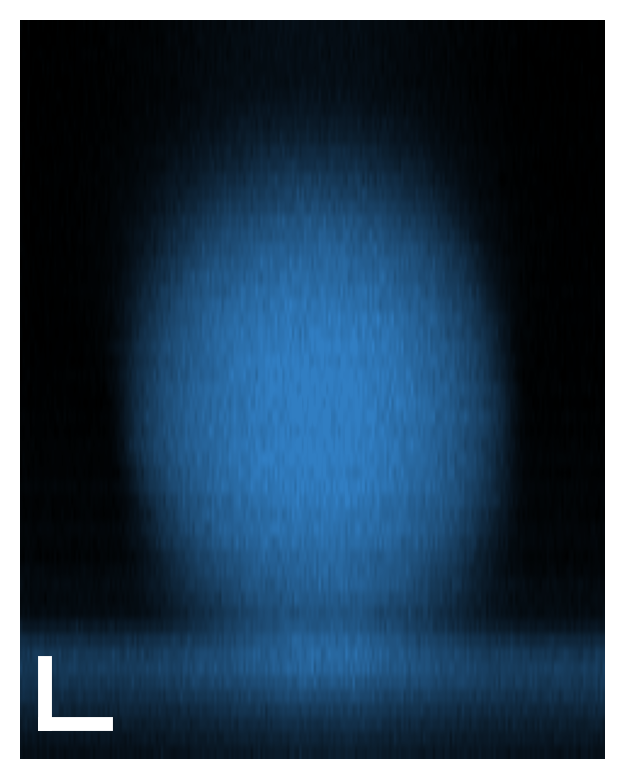

In [73]:
img = imread("20230911-Cy5-zStack1.tif")
um_per_pixel_xy = 0.04
um_per_pixel_z = 0.23

img_toplot = img[3:-12, :, :-15].sum(axis=1)
vmin, vmax = np.percentile(img_toplot, (0.5, 99))

aspect = um_per_pixel_z / um_per_pixel_xy

plt.figure(dpi=200)
plt.imshow(
    img_toplot,
    aspect=aspect,
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
)

# plot scale bar
scalebar_length_um = 1
scalebar_length_pxl_x = scalebar_length_um / um_per_pixel_xy
scalebar_length_pxl_z = scalebar_length_um / um_per_pixel_z
plt.plot(
    [10, 10 + scalebar_length_pxl_x],
    [2, 2],
    "-",
    color="white",
    lw=5,
)
plt.plot(
    [10, 10],
    [2, 2 + scalebar_length_pxl_z],
    "-",
    color="white",
    lw=5,
)

plt.gca().invert_yaxis()
plt.axis("off")
plt.savefig("Fig1_condensate_sideview.png", dpi=300, format="png", bbox_inches='tight')
plt.show()